In [98]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import skfuzzy.control as ctrl

In [99]:
df = pd.read_csv('kelompok1.csv')

In [100]:
data = df[['Pitch', 'Label']]

In [101]:
# Map label kelas menjadi angka (0, 1, 2)
data['Label'] = data['Label'].map({'Terbalik': 0, 'Tidur': 1, 'Berdiri': 2})

Label 0 = Terbalik,
Label 1 = Tidur,
Label 2 = Berdiri

In [102]:
x = data[['Pitch']]
y = data['Label']
print(y)
print(x)

0      2
1      2
2      2
3      2
4      2
      ..
262    0
263    0
264    0
265    0
266    0
Name: Label, Length: 267, dtype: int64
     Pitch
0   -88.99
1   -88.99
2   -88.99
3   -89.11
4   -89.11
..     ...
262  88.50
263  88.50
264  88.58
265  88.58
266  88.58

[267 rows x 1 columns]


In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [104]:
# Fuzzy Input Variables
input_pitch = ctrl.Antecedent(np.arange(-100, 100, 1), 'Pitch')
output = ctrl.Consequent(np.arange(0, 3, 1), 'Label')

In [105]:
# Define fuzzy membership functions
input_pitch['Low'] = fuzz.trimf(input_pitch.universe, [20, 70, 100])
input_pitch['Medium'] = fuzz.trimf(input_pitch.universe, [-15, 0, 15])
input_pitch['High'] = fuzz.trimf(input_pitch.universe, [-100, -70, -20])


output['Terbalik'] = fuzz.trimf(output.universe, [0, 0, 0])
output['Tidur'] = fuzz.trimf(output.universe, [1, 1, 1])
output['Berdiri'] = fuzz.trimf(output.universe, [2, 2, 2])

In [106]:
# Define fuzzy rules
rule1 = ctrl.Rule(input_pitch['Low'], output['Terbalik'])
rule2 = ctrl.Rule(input_pitch['Medium'], output['Tidur'])
rule3 = ctrl.Rule(input_pitch['High'], output['Berdiri'])

rules = ctrl.ControlSystem([rule1, rule2, rule3])
simulation = ctrl.ControlSystemSimulation(rules)

In [107]:
# Apply fuzzy logic to testing dataset
output_test = []
for i in range(len(X_test)):
    simulation.input['Pitch'] = X_test['Pitch'].iloc[i]
    simulation.compute()
    output_test.append(simulation.output['Label'])

In [108]:
output_test = np.array(output_test).round().astype(int)

In [110]:
# Generate random Pitch values for testing
random_pitch_values = np.random.uniform(-89, 89, 5)  # Ubah 10 menjadi jumlah nilai acak yang diinginkan

# Inisialisasi array untuk menyimpan hasil prediksi
predicted_labels = []

# Apply fuzzy logic to random pitch values
for pitch_value in random_pitch_values:
    simulation.input['Pitch'] = pitch_value
    simulation.compute()
    predicted_labels.append(simulation.output['Label'])

# Convert hasil prediksi fuzzy menjadi biner
predicted_labels = np.array(predicted_labels).round().astype(int)

# Print nilai acak dan hasil prediksi
print("Random Pitch Values:", random_pitch_values)
print("Predicted Labels:", predicted_labels)


Random Pitch Values: [-71.51591037  46.59778331  87.71744905  38.76264087  42.70109978]
Predicted Labels: [2 0 0 0 0]


In [111]:
# Generate random pitch values for testing
random_pitch_values = np.random.uniform(-89, 89, 1)

# Inisialisasi array untuk menyimpan hasil prediksi dan derajat keanggotaannya
predicted_results = []

# Apply fuzzy logic to random pitch values
for pitch_value in random_pitch_values:
    simulation.input['Pitch'] = pitch_value
    simulation.compute()
    
    # Mendapatkan hasil prediksi dan derajat keanggotaannya
    prediction = {
        'pitch_value': pitch_value,
        'predicted_label': simulation.output['Label'],
        'membership_degrees': {
            'Berdiri': output['Berdiri'].membership_value,
            'Tidur': output['Tidur'].membership_value,
            'Terbalik': output['Terbalik'].membership_value
        }
    }
    
    predicted_results.append(prediction)

# Print hasil prediksi dan derajat keanggotaannya
for result in predicted_results:
    print("Pitch Value:", result['pitch_value'])
    print("Predicted Label:", result['predicted_label'])

Pitch Value: 65.67508210052037
Predicted Label: 0.3356287704378863


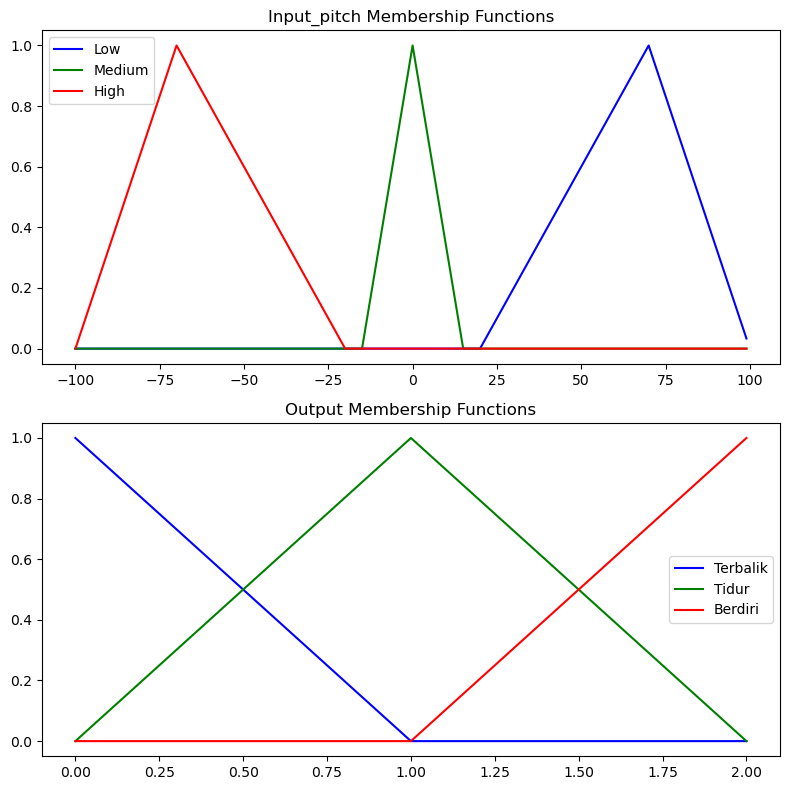

In [112]:
# Plot membership functions for input_pitch and output in one graph
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 8))

# Plot input_pitch membership functions
ax1.plot(input_pitch.universe, fuzz.trimf(input_pitch.universe, [20, 70, 100]), 'b', linewidth=1.5, label='Low')
ax1.plot(input_pitch.universe, fuzz.trimf(input_pitch.universe, [-15, 0, 15]), 'g', linewidth=1.5, label='Medium')
ax1.plot(input_pitch.universe, fuzz.trimf(input_pitch.universe, [-100, -70, -20]), 'r', linewidth=1.5, label='High')
ax1.set_title('Input_pitch Membership Functions')
ax1.legend()

# Plot output membership functions
ax2.plot(output.universe, fuzz.trimf(output.universe, [0, 0, 0]), 'b', linewidth=1.5, label='Terbalik')
ax2.plot(output.universe, fuzz.trimf(output.universe, [1, 1, 1]), 'g', linewidth=1.5, label='Tidur')
ax2.plot(output.universe, fuzz.trimf(output.universe, [2, 2, 2]), 'r', linewidth=1.5, label='Berdiri')
ax2.set_title('Output Membership Functions')
ax2.legend()

plt.tight_layout()
plt.show()